# **Overview of some important features of a selection of scientific Python packages that are extensively used for scientific programming.**

In [1]:
# array math
import numpy as np

# plotting
import matplotlib.pyplot as plt

# labelled multidimensional arrays
import xarray as xr

# working with timeseries and tables
import pandas as pd

# 1. Numpy

[Numpy](https://numpy.org/doc/stable/user/index.html) is arguably the fundamental package for scientific computing in Python. It enables plenty of operations for multidimensional arrays.

## 1.1 Array creation

In [2]:
# create an array from a list.
a_list = [1, 10, 20, 33, 101, 10]
arr1D = np.array(a_list)
arr1D

array([  1,  10,  20,  33, 101,  10])

In [3]:
# create an array for a certain range defining step size
arr1D = np.arange(0, 10, 1)
arr1D

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
# create an array for a certain range defining the array size
arr1D = np.linspace(0, 9, 10)
arr1D

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [5]:
# create a two dimensional array.
arr2D = np.arange(0, 12, 1).reshape(3, 4)
arr2D

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

We can look at the shape of arrays to see how many entries and dimensions it has.    

In [6]:
arr1D.shape

(10,)

In [7]:
arr2D.shape

(3, 4)

## 1.2 Array slicing

If we want only a subset of an array we can select slices.

**One dimensional**

In [8]:
# create array
arr1D = np.arange(0, 12, 1)
arr1D

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [9]:
# define start and end
arr1D[2:5]

array([2, 3, 4])

In [10]:
# define start only
arr1D[2:]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [11]:
# count from back using negative numbers
arr1D[2:-1]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

**Two dimensional**

In [12]:
# create array
arr2D = np.arange(0, 12, 1).reshape(3, 4)
arr2D

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [13]:
# select one entire column
arr2D[:, 0]

array([0, 4, 8])

In [14]:
# select one entire row
arr2D[1, :]

array([4, 5, 6, 7])

In [15]:
# a small subset
arr2D[0:2, 1:3]

array([[1, 2],
       [5, 6]])

## 1.3 Array algebra

Algebraic calculations can be performed fast and conveniently with numpy. Broadcasting rules allow both bitwise (by default if shapes are equal) and scalar multiplication and summation.

In [16]:
# show array again
arr2D

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

**Multiplication**

In [17]:
# bitwise
arr2D * arr2D

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

In [18]:
# scalar
arr2D * 3

array([[ 0,  3,  6,  9],
       [12, 15, 18, 21],
       [24, 27, 30, 33]])

**Summation**

In [19]:
# bitwise
arr2D - arr2D

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [20]:
# scalar
arr2D + 4

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

## 1.4 Other usefull functionality

**Random numbers**

In [21]:
x = np.random.rand(10)
x

array([0.73287929, 0.69904708, 0.99762613, 0.8002543 , 0.91219946,
       0.53269144, 0.64387218, 0.15823833, 0.42930394, 0.3911754 ])

**Mathematical constants and built-in functions**

In [22]:
# pi
np.pi

3.141592653589793

In [23]:
# sinus
np.sin(np.pi/2)

np.float64(1.0)

In [24]:
# show array again
arr2D

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [25]:
# mean, max, min, standard deviation
print(arr2D.mean())
print(arr2D.max())
print(arr2D.min())
print(arr2D.std())

5.5
11
0
3.452052529534663


**Initialization of arrays of certain shapes**

In [26]:
x = np.ones((3,3))
x

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [27]:
x = np.zeros((3,3))
x

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [28]:
x = np.ones_like(arr2D)
x

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [29]:
x = np.zeros_like(arr2D)
x

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

**Missing values (NaN)**

In [30]:
# create array with nan
arr1D = np.array([1, 2, np.nan, 4])
arr1D

array([ 1.,  2., nan,  4.])

In [31]:
# find indices of missing values
nan_ix = np.isnan(arr1D)
nan_ix

array([False, False,  True, False])

In [32]:
# set all missing values to zero
arr1D[nan_ix] = 0
arr1D

array([1., 2., 0., 4.])

## 1.5 Speed and data types

**Speed**

Numpy is implemented in C and Fortran which allows vectorized computations to be very fast. One should generally **avoid for-loops** and perform operations on whole vectors where possible.

In [33]:
# some array
x = np.arange(0, 10, 0.1)

In [34]:
%%time
# call the exponential function for each element at a time in a for-loop
y = np.zeros_like(x)
for i in range(len(x)):
    y[i] = np.exp(x[i])

CPU times: user 148 μs, sys: 6 μs, total: 154 μs
Wall time: 158 μs


In [35]:
%%time
# the same as above but vectorized
y = np.exp(x)

CPU times: user 24 μs, sys: 1 μs, total: 25 μs
Wall time: 29.1 μs


**Data Types**

Numpy arrays have a homogenous type (e.g. `int, float, complex, bool, object`) for which the size can also be explicitly defined (e.g. `int64, int16, float128, complex128`)

In [36]:
# force array to be of type integer
x = np.array([1.1111, 2.323], dtype=int)
x

array([1, 2])

In [37]:
# force array to be of type float (default in this case)
x = np.array([1.1111, 2.323], dtype=float)
x

array([1.1111, 2.323 ])

***
# 2. Matplotlib

[Matplotlib](https://matplotlib.org/stable/) is the de facto standard plotting library for Python.

In [38]:
import matplotlib.pyplot as plt

In [39]:
# enables plots to be shown directly in the notebook
%matplotlib inline

## 2.1 Simple plots

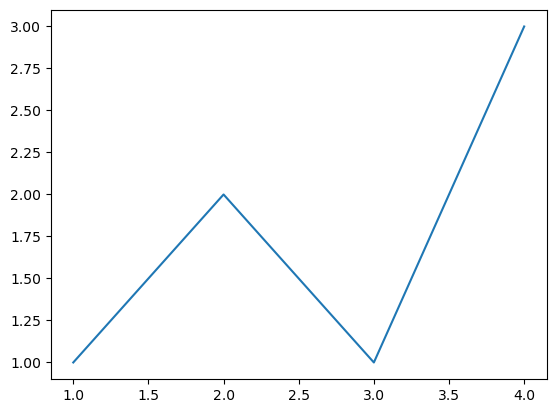

In [40]:
# default line plot
plt.plot([1,2,3,4], [1,2,1,3]);

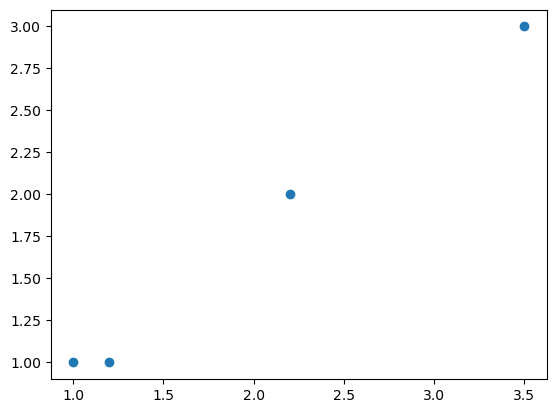

In [41]:
# scatter plot
plt.scatter([1,2.2,1.2,3.5], [1,2,1,3]);

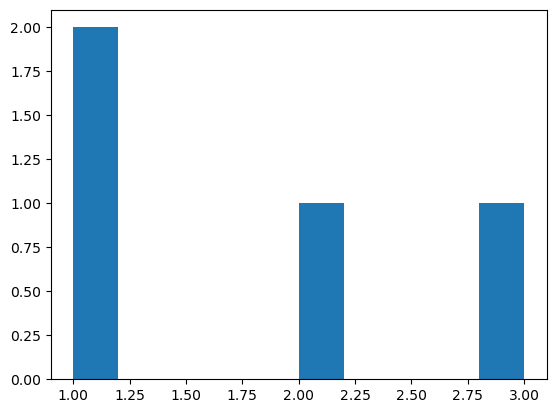

In [42]:
# histogram
plt.hist([1,2,1,3]);

## 2.2 Plot adjustments

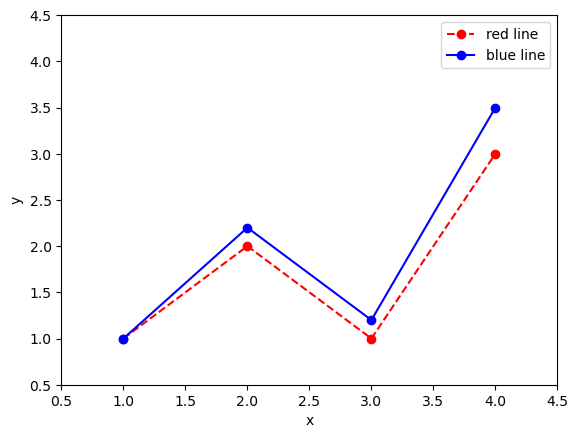

In [43]:
# first line
plt.plot([1,2,3,4],[1,2,1,3], color='r', marker='o', linestyle='--', label='red line')

# second line
plt.plot([1,2,3,4],[1,2.2,1.2,3.5], color='b', marker='o', linestyle='-', label='blue line')

# set axis labels
plt.xlabel('x')
plt.ylabel('y')

# set axis limits
plt.xlim(0.5,4.5)
plt.ylim(0.5,4.5)

# add legend
# the semicolon at the end surpresses the object text output
plt.legend();

## 2.3 Plots of two-dimensional data

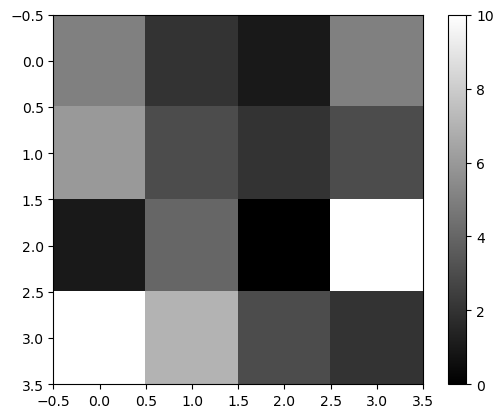

In [44]:
# create some array
M = [[5,2,1,5],
     [6,3,2,3],
     [1,4,0,10],
     [10,7,3,2]]

# plot
plt.imshow(M, cmap='gray')
plt.grid(False)
plt.colorbar();

## 2.4 Object-oriented plotting

For more complex figures we can use a different approach to plotting. This is especially helpful when creating figures with subplots.

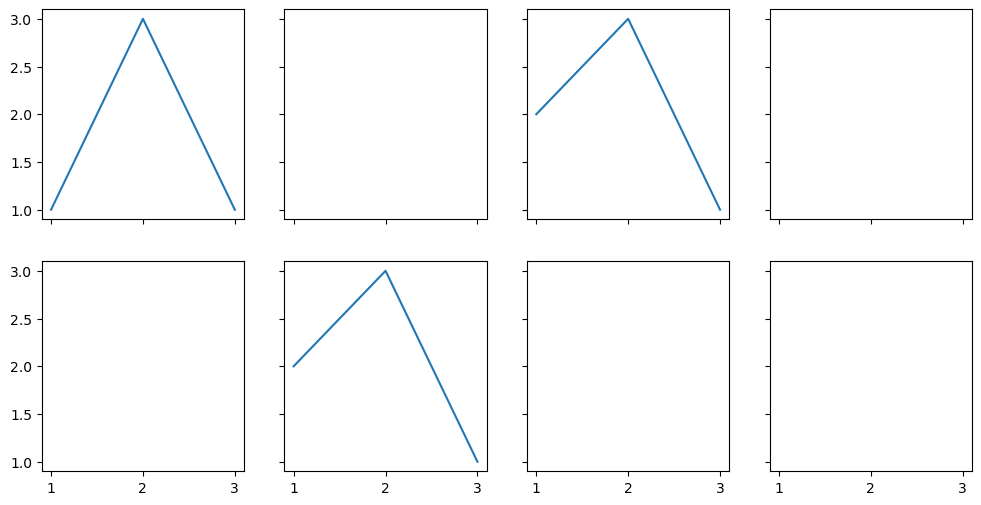

In [45]:
 # initialize figure and subplot axes
fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True, figsize=(12,6))

# add plots to some subplots
ax[0,0].plot([1,2,3],[1,3,1])
ax[1,1].plot([1,2,3],[2,3,1])
ax[0,2].plot([1,2,3],[2,3,1])
# ax[0,3].plot([1,2,3],[3,1,1])
# ax[1,3].scatter([1,2,3],[2,2,2])

***
# 3. Xarray

[Xarray](https://xarray.pydata.org/en/stable/index.html) is a package for working with labelled multi-dimensional arrays.

In [46]:
data_3D = np.arange(60).reshape(3,4,5)
data_3D

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [47]:
data_3D.shape

(3, 4, 5)

## 3.1 Introduction to Datasets and Data Arrays

### 3.1.1 From Numpy arrays to datasets

Lets first look at a numpy array again:

In [48]:
data_3D = np.arange(60).reshape(3,4,5)
data_3D

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [49]:
data_3D.shape

(3, 4, 5)

In [50]:
data_2D = np.linspace(0,1,12).reshape(3,4)
data_2D

array([[0.        , 0.09090909, 0.18181818, 0.27272727],
       [0.36363636, 0.45454545, 0.54545455, 0.63636364],
       [0.72727273, 0.81818182, 0.90909091, 1.        ]])

In [51]:
data_2D.shape

(3, 4)

With numpy arrays we do not have information about the coordinates or the order of dimensions stored with the data. This may lead to confusion with large (high-dimensional) data sets. The `xarray.Dataset` objects improves working with such data.

### 3.1.2 Read in a netcdf file

Multidimensional environental data is often stored in the netcdf file format. We can easily open such files using xarray. We then have a representation (a `xarray.Dataset`) to work with.

In [52]:
# load dataset from netcdf
ds = xr.open_dataset('first_example_data.nc')
ds

<xarray.Dataset> Size: 672B
Dimensions:  (x: 3, y: 4, z: 5)
Coordinates:
  * x        (x) float64 24B 0.0 1.0 2.0
  * y        (y) float64 32B 0.0 1.0 2.0 3.0
  * z        (z) float64 40B -2.0 -1.0 0.0 1.0 2.0
Data variables:
    data_3D  (x, y, z) int64 480B ...
    data_2D  (x, y) float64 96B ...

`xarray.Datasets` objects may contain many data variables. Each of those can be used as a `xarray.DataArray` object.

In [53]:
# Data Array
da = ds.data_2D
da

<xarray.DataArray 'data_2D' (x: 3, y: 4)> Size: 96B
[12 values with dtype=float64]
Coordinates:
  * x        (x) float64 24B 0.0 1.0 2.0
  * y        (y) float64 32B 0.0 1.0 2.0 3.0

### 3.1.3 Create a dataset from scratch

Lets see how we can create the dataset shown above.

We can first define coordinates. In this case we have three dimensions. The coordinates help to locate every entry in space.

In [54]:
# define coordinates
x = np.linspace(0, 2, 3)
y = np.linspace(0, 3, 4)
z = np.linspace(-2, 2, 5)

The creation of the `dataset` then requires a specific syntax:

The main input is a dictionary of varibles (`data_vars`). For each variable we need to assing its dimension labels together with the data in a tuple `(dims, data)`. The shape of the variables needs to be consistent with the length of the coordinates of the dimensions. 

The second input is a dictionary of the coordinates (`coords`).

In [55]:
# create dataset
ds = xr.Dataset(data_vars={
    'data_3D': (('x', 'y', 'z'), data_3D)
}, coords={
    'x': x,
    'y': y,
    'z': z,
})
ds

<xarray.Dataset> Size: 576B
Dimensions:  (x: 3, y: 4, z: 5)
Coordinates:
  * x        (x) float64 24B 0.0 1.0 2.0
  * y        (y) float64 32B 0.0 1.0 2.0 3.0
  * z        (z) float64 40B -2.0 -1.0 0.0 1.0 2.0
Data variables:
    data_3D  (x, y, z) int64 480B 0 1 2 3 4 5 6 7 8 ... 52 53 54 55 56 57 58 59

We can define all variables directly when creating the `dataset` or we can later add variables as follows.

In [56]:
# add another variable to the dataset
ds['data_2D'] = (('x','y'), data_2D)
ds

<xarray.Dataset> Size: 672B
Dimensions:  (x: 3, y: 4, z: 5)
Coordinates:
  * x        (x) float64 24B 0.0 1.0 2.0
  * y        (y) float64 32B 0.0 1.0 2.0 3.0
  * z        (z) float64 40B -2.0 -1.0 0.0 1.0 2.0
Data variables:
    data_3D  (x, y, z) int64 480B 0 1 2 3 4 5 6 7 8 ... 52 53 54 55 56 57 58 59
    data_2D  (x, y) float64 96B 0.0 0.09091 0.1818 0.2727 ... 0.8182 0.9091 1.0

Then, we can save a dataset as a netcdf file.

In [57]:
# ds.to_netcdf('scientific_python_example_data/first_example_data.nc')

## 3.2 Working with datasets

In [58]:
# load a different data set
ds = xr.open_dataset('temp_example.nc')
ds

<xarray.Dataset> Size: 3MB
Dimensions:  (time: 79200, obs_id: 3)
Coordinates:
  * time     (time) datetime64[ns] 634kB 2020-07-09 ... 2022-01-09T23:50:00
  * obs_id   (obs_id) <U1 12B 'A' 'B' 'C'
Data variables:
    temp     (time, obs_id) float64 2MB ...

We will see how to work with datsets using this examplatory data. The the data is temperature observations of three sensors over a period of one and a half years measuring at a frequency of ten minutes.

### 3.2.1 Resample time

In [61]:
# resample from minutes to hours
hourly_rain = ds.temp.resample(time='1h', closed="right", label="right").mean(dim='time')
hourly_rain

<xarray.DataArray 'temp' (time: 13201, obs_id: 3)> Size: 317kB
array([[13.3       ,         nan, 15.6       ],
       [13.28333333,         nan, 15.63333333],
       [13.01666667,         nan, 15.58333333],
       ...,
       [ 3.4       ,  0.31666667,  1.58333333],
       [ 2.96666667,  0.06666667,  1.7       ],
       [ 3.2       ,  0.18      ,  1.46      ]])
Coordinates:
  * obs_id   (obs_id) <U1 12B 'A' 'B' 'C'
  * time     (time) datetime64[ns] 106kB 2020-07-09 ... 2022-01-10

In [62]:
# resample from minutes to days
daily_rain = ds.temp.resample(time='1D', closed="right", label="right",).mean(dim='time')
daily_rain

<xarray.DataArray 'temp' (time: 551, obs_id: 3)> Size: 13kB
array([[13.3       ,         nan, 15.6       ],
       [13.67986111, 22.57009346, 21.7       ],
       [13.31458333, 22.55902778, 20.37708333],
       ...,
       [ 2.51597222, -0.81527778,  1.39097222],
       [ 2.02638889, -0.5625    ,  2.08680556],
       [ 3.84265734,  0.70839161,  3.96993007]])
Coordinates:
  * obs_id   (obs_id) <U1 12B 'A' 'B' 'C'
  * time     (time) datetime64[ns] 4kB 2020-07-09 2020-07-10 ... 2022-01-10

### 3.2.2 Selection

A major advantage of working with xarray is that we can use the dimension labels to select data. We do not need to remember the order of dimesions and the index position of coordinates.

In [63]:
# select along one dimension
ds.temp.sel(time='2022-01-01 13:00')

<xarray.DataArray 'temp' (obs_id: 3)> Size: 24B
[3 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 8B 2022-01-01T13:00:00
  * obs_id   (obs_id) <U1 12B 'A' 'B' 'C'

We can select slices (e.g. two hours of the data) as follows

In [64]:
# select slice
ds.temp.sel(time=slice('2022-01-01 09:00', '2022-01-01 11:00'))

<xarray.DataArray 'temp' (time: 13, obs_id: 3)> Size: 312B
[39 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 104B 2022-01-01T09:00:00 ... 2022-01-01T11...
  * obs_id   (obs_id) <U1 12B 'A' 'B' 'C'

We can select by multiple dimension labels simultaneously. 

In [65]:
# select along two dimensions
ds.temp.sel(time='2022-01-01 13:00', obs_id='B')

<xarray.DataArray 'temp' ()> Size: 8B
[1 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 8B 2022-01-01T13:00:00
    obs_id   <U1 4B 'B'

Selection by index (instead of dimension label) is still possible using `isel()`.

In [66]:
# select by index
ds.temp.isel(time=0)

<xarray.DataArray 'temp' (obs_id: 3)> Size: 24B
[3 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 8B 2020-07-09
  * obs_id   (obs_id) <U1 12B 'A' 'B' 'C'

### 3.2.3 Basic functions

In [67]:
# mean over time
ds.temp.mean('time')

<xarray.DataArray 'temp' (obs_id: 3)> Size: 24B
array([10.48778754,  9.5961583 , 10.71218939])
Coordinates:
  * obs_id   (obs_id) <U1 12B 'A' 'B' 'C'

In [68]:
ds.temp.max('time')

<xarray.DataArray 'temp' (obs_id: 3)> Size: 24B
array([34.8, 33.4, 36.2])
Coordinates:
  * obs_id   (obs_id) <U1 12B 'A' 'B' 'C'

In [69]:
ds.temp.min('time')

<xarray.DataArray 'temp' (obs_id: 3)> Size: 24B
array([-16.6, -13.8, -12.4])
Coordinates:
  * obs_id   (obs_id) <U1 12B 'A' 'B' 'C'

### 3.2.4 Search by condition

In [70]:
# define condtition
cond = ds.temp < 5

In [71]:
# select using where (set to NaN if condition is not met)
ds.temp.where(cond)

<xarray.DataArray 'temp' (time: 79200, obs_id: 3)> Size: 2MB
array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [3.3, 0.1, 1.5],
       [3.3, 0.3, 1.4],
       [3.4, 0.4, 1.4]])
Coordinates:
  * time     (time) datetime64[ns] 634kB 2020-07-09 ... 2022-01-09T23:50:00
  * obs_id   (obs_id) <U1 12B 'A' 'B' 'C'

In [72]:
# select using where (delete if condition is not met)
ds.temp.where(cond, drop=True)

<xarray.DataArray 'temp' (time: 30868, obs_id: 3)> Size: 741kB
array([[4.9, nan, nan],
       [4.6, nan, nan],
       [4.6, nan, nan],
       ...,
       [3.3, 0.1, 1.5],
       [3.3, 0.3, 1.4],
       [3.4, 0.4, 1.4]])
Coordinates:
  * time     (time) datetime64[ns] 247kB 2020-09-18T00:20:00 ... 2022-01-09T2...
  * obs_id   (obs_id) <U1 12B 'A' 'B' 'C'

### 3.2.5 Other useful functionality

**Plotting** 

We can use data arrays and create plots using **Matplotlib** as described above.

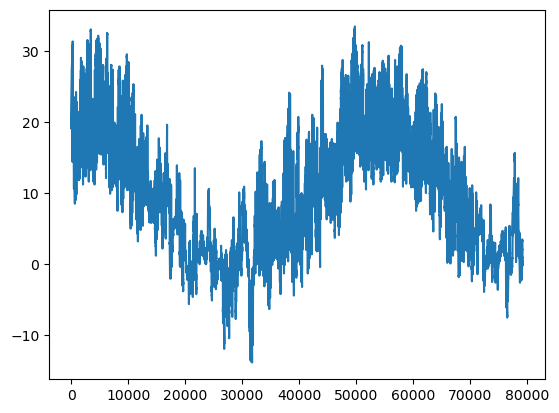

In [73]:
fig, ax = plt.subplots()
ax.plot(ds.temp.sel(obs_id='B'))

However, we can also use the xarray plotting functionality. In this case title, axes labels, and meaningful tick labels are added automatically.

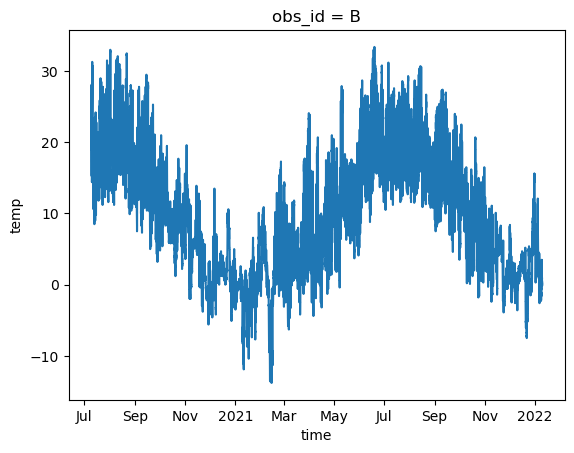

In [74]:
fig, ax = plt.subplots()
ds.temp.sel(obs_id='B').plot.line(ax=ax)

**Transform to numpy objects**

Sometimes, we still want to work with numpy arrays instead of xarray data arrays. In this case we can easily transform the data using `.values`. We are then left with the pure array without information on dimensions and coordinates.

In [75]:
ds.temp.values

array([[13.3,  nan, 15.6],
       [13.4,  nan, 15.6],
       [13.3,  nan, 15.6],
       ...,
       [ 3.3,  0.1,  1.5],
       [ 3.3,  0.3,  1.4],
       [ 3.4,  0.4,  1.4]])

**Missing values**

In [76]:
ds.temp.isnull()

<xarray.DataArray 'temp' (time: 79200, obs_id: 3)> Size: 238kB
array([[False,  True, False],
       [False,  True, False],
       [False,  True, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])
Coordinates:
  * time     (time) datetime64[ns] 634kB 2020-07-09 ... 2022-01-09T23:50:00
  * obs_id   (obs_id) <U1 12B 'A' 'B' 'C'

***
# 4. Pandas

[Pandas](https://pandas.pydata.org/) is a powerful time series analysis package. Here we only want to cover its functionality very briefly; the purpose is just to enable to work with `xarray` when the data one uses is stored as csv tables.

In [77]:
import pandas as pd

## 4.1 Read in a csv file

Load a csv table as a `pandas.Dataframe`

In [78]:
# load csv table
df = pd.read_csv('temp_example.csv',
                delimiter=',',
                index_col='time',)
# show first lines
df.head()

,A,B,C
time,,,
2020-07-09 00:00:00,13.3,NaN,15.6
2020-07-09 00:10:00,13.4,NaN,15.6
2020-07-09 00:20:00,13.3,NaN,15.6
2020-07-09 00:30:00,13.3,NaN,15.7
2020-07-09 00:40:00,13.3,NaN,15.6


## 4.2 Datetime object

Pandas is particularly useful for time series data. It is convenient to work with `datetime` objects as this allow easy computations (e.g. adding a month or 100 minutes) without having to grapple with the different numeral systems involved in time.

In [79]:
# show data type of index variable
df.index.dtype

dtype('O')

In [80]:
# change data type
df.index = pd.to_datetime(df.index)
df.head()

,A,B,C
time,,,
2020-07-09 00:00:00,13.3,NaN,15.6
2020-07-09 00:10:00,13.4,NaN,15.6
2020-07-09 00:20:00,13.3,NaN,15.6
2020-07-09 00:30:00,13.3,NaN,15.7
2020-07-09 00:40:00,13.3,NaN,15.6


In [81]:
# show datatype of index variable after change
df.index.dtype

dtype('<M8[ns]')

## 4.3 Transform to xarray dataset

In [82]:
# create xarray dataset from data stored in a pandas dataframe
ds = xr.Dataset(
    data_vars={
        'temp': (('time','obs_id'), df.values),
    },
    coords={
        'time': df.index,
        'obs_id': df.columns,
    }
)
ds

<xarray.Dataset> Size: 3MB
Dimensions:  (time: 79200, obs_id: 3)
Coordinates:
  * time     (time) datetime64[ns] 634kB 2020-07-09 ... 2022-01-09T23:50:00
  * obs_id   (obs_id) object 24B 'A' 'B' 'C'
Data variables:
    temp     (time, obs_id) float64 2MB 13.3 nan 15.6 13.4 ... 1.4 3.4 0.4 1.4